In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
REROLL_COST = 50.0
dust_value = 0.2568   # 0.26 or 0.29
gold_value = 1000 / 17505  # 0.035 or 0.043
blue_value = 2.6  # 2.6 for high value (to have same value as L dust), 0 for low value
MULTIPLE = 2  # Change to 2 for double Bounty
drop_table = {
    "DustL": {
        "Quantity": 150,
        "Value": dust_value,
        "p": 0.3375,
    },
    "DustM": {
        "Quantity": 500,
        "Value": dust_value,
        "p": 0.03,
    },
    "DustA": {
        "Quantity": 800,
        "Value": dust_value,
        "p": 0.0075,
    },
    "GoldL": {
        "Quantity": 173,
        "Value": gold_value,
        "p": 0.3375,
    },
    "GoldM": {
        "Quantity": 246,
        "Value": gold_value,
        "p": 0.03,
    },
    "GoldA": {
        "Quantity": 321,
        "Value": gold_value,
        "p": 0.0075,
    },
    "BlueL": {
        "Quantity": 15,
        "Value": blue_value,
        "p": 0.1125,
    },
    "BlueM": {
        "Quantity": 25,
        "Value": blue_value,
        "p": 0.01,
    },
    "BlueA": {
        "Quantity": 40,
        "Value": blue_value,
        "p": 0.0025,
    },
    "DiamondL": {
        "Quantity": 60,
        "Value": 1,
        "p": 0.1125,
    },
    "DiamondM": {
        "Quantity": 100,
        "Value": 1,
        "p": 0.01,
    },
    "DiamondA": {
        "Quantity": 150,
        "Value": 1,
        "p": 0.0025,
    }
}
N = len(drop_table)
drop_df = pd.DataFrame.from_dict(drop_table, orient='index')
drop_df.Quantity *= MULTIPLE
drop_df['TotalValue'] = drop_df.Value * drop_df.Quantity
print(drop_df)
SINGLE_EV = np.sum(drop_df.TotalValue * drop_df.p)

          Quantity     Value       p  TotalValue
DustL          300  0.256800  0.3375   77.040000
DustM         1000  0.256800  0.0300  256.800000
DustA         1600  0.256800  0.0075  410.880000
GoldL          346  0.057127  0.3375   19.765781
GoldM          492  0.057127  0.0300   28.106255
GoldA          642  0.057127  0.0075   36.675236
BlueL           30  2.600000  0.1125   78.000000
BlueM           50  2.600000  0.0100  130.000000
BlueA           80  2.600000  0.0025  208.000000
DiamondL       120  1.000000  0.1125  120.000000
DiamondM       200  1.000000  0.0100  200.000000
DiamondA       300  1.000000  0.0025  300.000000


In [3]:
magic_number_dict = {1: np.array([44.00601, 42.62974, 41.21228, 39.85913, 38.65864, 37.80118, 37.03364, 36.33974, 35.80604, 35.7104]),
                     2: np.array([111.87832, 108.88099, 105.49544, 101.62087, 97.28789, 92.36578, 87.08076, 81.40006, 75.58795, 71.4208])}

In [4]:
def roll(quest_slot):
  return np.random.choice(N, quest_slot, p=drop_df.p)

test_roll = roll(quest_slot=8)
test_roll

array([0, 3, 3, 3, 3, 3, 3, 0])

In [5]:
def calculate_value(choices_array):
  return np.sum(drop_df.TotalValue[choices_array])

calculate_value(test_roll)

272.67468723221936

In [6]:
def quests_to_values(quests_matrix):
  old_shape = quests_matrix.shape
  return drop_df.TotalValue[quests_matrix.flatten()].to_numpy().reshape(old_shape)

quests_to_values(roll((5, 10)))

array([[120.        ,  19.76578121,  19.76578121,  78.        ,
         77.04      ,  28.10625536, 120.        ,  78.        ,
         77.04      , 256.8       ],
       [ 19.76578121,  77.04      , 256.8       ,  77.04      ,
         77.04      ,  77.04      , 120.        ,  77.04      ,
         77.04      ,  28.10625536],
       [120.        ,  77.04      ,  78.        ,  19.76578121,
         77.04      ,  77.04      , 120.        ,  19.76578121,
         19.76578121, 120.        ],
       [ 77.04      ,  78.        ,  19.76578121,  78.        ,
         19.76578121,  77.04      ,  19.76578121, 256.8       ,
         19.76578121,  19.76578121],
       [ 77.04      ,  19.76578121,  78.        ,  77.04      ,
         19.76578121,  77.04      ,  78.        ,  77.04      ,
         77.04      , 120.        ]])

In [7]:
def print_names(choices_array):
  print(drop_df.iloc[choices_array])

print_names(test_roll)

       Quantity     Value       p  TotalValue
DustL       300  0.256800  0.3375   77.040000
GoldL       346  0.057127  0.3375   19.765781
GoldL       346  0.057127  0.3375   19.765781
GoldL       346  0.057127  0.3375   19.765781
GoldL       346  0.057127  0.3375   19.765781
GoldL       346  0.057127  0.3375   19.765781
GoldL       346  0.057127  0.3375   19.765781
DustL       300  0.256800  0.3375   77.040000


In [8]:
def reroll_og(choices_array):
  possible_reroll = drop_df.TotalValue[choices_array] < REROLL_COST / 2
  if sum(possible_reroll) < 2:
    possible_reroll[:] = False
  return possible_reroll

reroll_og(test_roll)

DustL    False
GoldL     True
GoldL     True
GoldL     True
GoldL     True
GoldL     True
GoldL     True
DustL    False
Name: TotalValue, dtype: bool

In [9]:
def single_run(quest_no, reroll_func, init=None, debug=False):
  keep = np.array([], dtype=np.int16)
  reroll_count = 0
  if init is None:
    r = roll(quest_no)
  else:
    r = np.array(init)
  while True:
    # Reroll decision
    re_roll = reroll_func(r)
    if debug and np.any(re_roll):
      print("*** REROLL ***")
      print_names(r[re_roll])
    keep = np.append(keep, r[np.invert(re_roll)])  # Append what are kept
    r = r[re_roll]
    if len(r) > 0:
      reroll_count += 1
    else:
      break
    
    ## New roll
    r = roll(len(r))
    if debug:
      print("*** ROLL ***")
      print_names(r)
  return keep, reroll_count

single_run(quest_no=8, reroll_func=reroll_og, debug=True)

*** REROLL ***
       Quantity     Value       p  TotalValue
GoldL       346  0.057127  0.3375   19.765781
GoldL       346  0.057127  0.3375   19.765781
*** ROLL ***
       Quantity     Value       p  TotalValue
GoldL       346  0.057127  0.3375   19.765781
GoldL       346  0.057127  0.3375   19.765781
*** REROLL ***
       Quantity     Value       p  TotalValue
GoldL       346  0.057127  0.3375   19.765781
GoldL       346  0.057127  0.3375   19.765781
*** ROLL ***
          Quantity   Value       p  TotalValue
DustL          300  0.2568  0.3375       77.04
DiamondM       200  1.0000  0.0100      200.00


(array([ 2,  6,  9,  9,  1, 10,  0, 10]), 2)

In [10]:
def simulate(repeat, reroll_func, init=None, quest_no=8):
  quests = []
  rerolls = []
  values = []
  for _ in tqdm(range(repeat)):
    _quests, _reroll = single_run(quest_no, reroll_func=reroll_func, init=init)
    quests.append(_quests)
    rerolls.append(_reroll)
    values.append(calculate_value(_quests) - REROLL_COST * _reroll)
  return np.array(quests), np.array(rerolls), np.array(values)

# q, r, v = simulate(repeat=1000, reroll_func=reroll_og)
# print(np.mean(v))

In [11]:
SINGLE_EV

71.4208030848329

In [12]:
def reroll_from_magic_number(choices_array):
  magic_number = magic_number_dict[MULTIPLE]
  value_array = drop_df.TotalValue[choices_array]
  # print(value_array)
  for j in range(len(choices_array), 0, -1):
    ev_j = magic_number[j - 1]
    # print(j, ev_j, np.sum(value_array < ev_j))
    if np.sum(value_array < ev_j) == j:
      # print(np.sum(np.maximum(ev_j - value_array, 0)) - REROLL_COST)
      if np.sum(np.maximum(ev_j - value_array, 0)) - REROLL_COST > 0:
        return value_array < ev_j
      else:
        return np.full_like(choices_array, fill_value=False, dtype=bool)
  return np.full_like(choices_array, fill_value=False, dtype=bool)

# init_board = [5, 0, 0, 0, 0, 0, 0, 0, 0]
# quest_no = len(init_board)
quest_no = 10
magic_number = magic_number_dict[MULTIPLE]
# _, _, v = simulate(repeat=1000, reroll_func=reroll_from_magic_number, init=init_board, quest_no=quest_no)
# single_run(quest_no=initial_quest_no, reroll_func=reroll_from_magic_number, debug=True)
q, r, v = simulate(repeat=1, reroll_func=reroll_from_magic_number, quest_no=quest_no)
print()
print(np.mean(v), np.std(v), np.mean(r))
print(magic_number[quest_no - 1] * quest_no)
# print("Base", calculate_value(init_board))

100%|██████████| 1/1 [00:00<00:00, 41.45it/s]


1095.6799999999998 0.0 12.0
714.208


In [13]:
_q = [0, 3, 3, 3, 3, 3, 9, 9, 9, 9]
print_names(_q)
print("Reroll decision")
print(reroll_from_magic_number(_q))

          Quantity     Value       p  TotalValue
DustL          300  0.256800  0.3375   77.040000
GoldL          346  0.057127  0.3375   19.765781
GoldL          346  0.057127  0.3375   19.765781
GoldL          346  0.057127  0.3375   19.765781
GoldL          346  0.057127  0.3375   19.765781
GoldL          346  0.057127  0.3375   19.765781
DiamondL       120  1.000000  0.1125  120.000000
DiamondL       120  1.000000  0.1125  120.000000
DiamondL       120  1.000000  0.1125  120.000000
DiamondL       120  1.000000  0.1125  120.000000
Reroll decision
DustL        True
GoldL        True
GoldL        True
GoldL        True
GoldL        True
GoldL        True
DiamondL    False
DiamondL    False
DiamondL    False
DiamondL    False
Name: TotalValue, dtype: bool


In [14]:
def array_reroll_from_magic_number(choices_matrix):
  # Dispatched quests are labeled -1
  magic_number = magic_number_dict[MULTIPLE]
  can_reroll = choices_matrix >= 0
  can_reroll_count = np.sum(can_reroll, axis=1)
  reroll_decision = np.full_like(choices_matrix, fill_value=False, dtype=bool)
  value_matrix = np.full_like(choices_matrix, fill_value=magic_number[-1], dtype=np.float32)
  value_matrix[can_reroll] = drop_df.TotalValue[choices_matrix[can_reroll]]
  for j in range(choices_matrix.shape[1], 0, -1):
    ev_j = magic_number[j - 1]
    z3_m = value_matrix < ev_j
    a = np.sum(z3_m, axis=1)
    reroll_contender = a == j
    should_reroll = np.sum(np.maximum(0, ev_j - value_matrix[reroll_contender, :]), axis=1) > REROLL_COST
    to_reroll = np.where(reroll_contender)[0][should_reroll]
    reroll_decision[to_reroll] = z3_m[to_reroll]
    value_matrix[to_reroll] = magic_number[-1]
  return reroll_decision

array_reroll_from_magic_number(roll((10, 9)))

array([[ True,  True,  True,  True, False,  True,  True,  True,  True],
       [False,  True,  True,  True, False,  True,  True, False, False],
       [False,  True,  True,  True,  True, False,  True,  True, False],
       [ True,  True,  True,  True, False,  True,  True,  True,  True],
       [False,  True, False, False,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True, False,  True,  True],
       [False,  True,  True,  True,  True, False,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True, False],
       [ True,  True,  True,  True,  True, False, False,  True,  True],
       [ True,  True,  True,  True, False,  True,  True,  True, False]])

In [15]:
def batch_run(quest_no, batch_size, reroll_func):
  keep = np.full((batch_size, quest_no), fill_value=False, dtype=bool)
  quests = np.zeros((batch_size, quest_no), dtype=int)
  reroll_count = np.zeros(batch_size, dtype=int)
  r = np.zeros((batch_size, quest_no), dtype=int)
  while True:
    to_roll = np.invert(keep)
    # r[to_roll] = roll((batch_size, quest_no))[to_roll]
    r[to_roll] = roll(np.sum(to_roll))
    r[keep] = -1  # Change index of quests that were kept to -1
    # Reroll decision
    re_roll = reroll_func(r)
    new_keep = np.logical_xor(keep, np.invert(re_roll))
    quests[new_keep] = r[new_keep]  # Cache quests that are kept
    keep = np.logical_or(keep, new_keep)  # Update what are kept
    reroll_count += (np.sum(re_roll, axis=1) > 0)
    if np.all(keep):
      break
  return quests, reroll_count

batch_run(9, 10000, array_reroll_from_magic_number)

(array([[ 0,  0,  0, ...,  3,  6,  0],
        [ 6,  0,  6, ..., -1,  9,  0],
        [ 6,  3,  6, ...,  1,  3,  3],
        ...,
        [-1,  3, -1, ..., -1,  0,  6],
        [-1, -1, -1, ...,  6,  0,  0],
        [ 9, -1, -1, ...,  1,  9,  0]]), array([0, 2, 1, ..., 2, 4, 3]))

In [16]:
def simulate_batch(repeat, reroll_func, quest_no=9):
  quests = np.array([], dtype=int).reshape(0, quest_no)
  rerolls = np.array([], dtype=int)
  values = []
  bs = 30000
  remain = repeat
  for _ in tqdm(range(repeat // bs + 1)):
    _bs = min(bs, remain)
    remain -= _bs
    _quests, _reroll = batch_run(quest_no, _bs, reroll_func=reroll_func)
    quests = np.concatenate((quests, _quests), axis=0)
    rerolls = np.concatenate((rerolls, _reroll), axis=0)
  return quests, rerolls

quest_no = 10
q, r = simulate_batch(1000000, array_reroll_from_magic_number, quest_no=quest_no)
v = np.sum(quests_to_values(q), axis=1) - REROLL_COST * r
print()
print(np.mean(v), np.std(v), np.mean(r))
print(magic_number[quest_no - 1] * quest_no)

100%|██████████| 34/34 [00:06<00:00,  5.23it/s]



880.3933106251694 426.6574061559679 0.83858
714.208


In [17]:
print(q.shape)

print("Quest Distribution")
dust = np.logical_and(q >= 0, q <= 2)
print("Dust", np.sum(dust))

blue = np.logical_and(q >= 6, q <= 8)
print("Blue", np.sum(blue))

gold = np.logical_and(q >= 3, q <= 5)
print("Gold", np.sum(gold))

diamond = np.logical_and(q >= 9, q <= 11)
print("Diamond", np.sum(diamond))

(1000000, 10)
Quest Distribution
Dust 3474934
Blue 1159125
Gold 3242827
Diamond 1397866


Average amount of reroll 0.83858


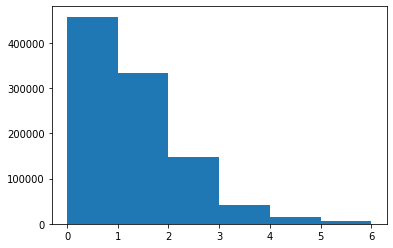

In [18]:
plt.hist(r, bins=np.arange(np.max(r)))
print("Average amount of reroll", np.mean(r))

139.78124


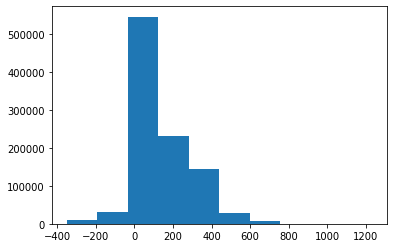

In [19]:
amt = drop_df.Quantity[q.flatten()].to_numpy().reshape(-1, quest_no)
amt[np.invert(np.logical_and(q >= 9, q <= 11))] = 0
diamond_exp = np.sum(amt, axis=1) - r * REROLL_COST
plt.hist(diamond_exp)
print(np.mean(diamond_exp))

162.586


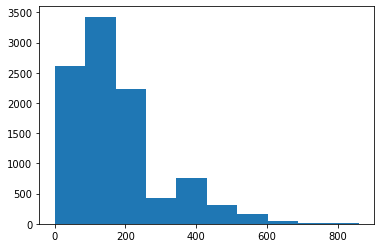

In [20]:
base_q = roll((10000, quest_no))
base_amt = drop_df.Quantity[base_q.flatten()].to_numpy().reshape(-1, quest_no)
base_amt[np.invert(np.logical_and(base_q >= 9, base_q <= 11))] = 0
base_diamond_exp = np.sum(base_amt, axis=1)
plt.hist(base_diamond_exp)
print(np.mean(base_diamond_exp))

(array([2.54241e+05, 3.89650e+05, 1.51066e+05, 8.76270e+04, 5.51840e+04,
        3.17360e+04, 1.67450e+04, 1.28890e+04, 8.47000e+02, 1.50000e+01]),
 array([ 305.16624964,  587.91362468,  870.66099971, 1153.40837475,
        1436.15574979, 1718.90312482, 2001.65049986, 2284.39787489,
        2567.14524993, 2849.89262496, 3132.64      ]),
 <a list of 10 Patch objects>)

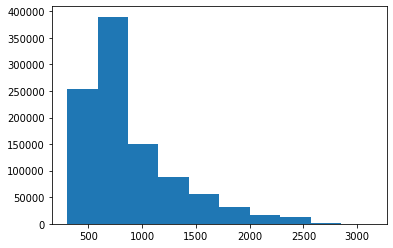

In [21]:
plt.hist(v)

In [22]:
def z_reroll(e, z, k, ev1, i):
  ev2 = np.append(ev1, e)
  z2 = z[(i - 1) * k: i * k]
  for j in range(k, 1, -1):
    z3 = z2[z2 < ev2[j - 1]]
    a = len(z3)
    if a == j:
      return np.sum(z2) + max(0, a * ev2[j - 1] - np.sum(z3) - REROLL_COST)
  return np.sum(z2)

In [23]:
def evgk(m, mm, k, ev1):
  e1 = np.max(ev1)
  e2 = np.max(drop_df.TotalValue)
  n = 1
  while True:
    s1 = []
    s2 = []
    n = min(mm, max(10, 100 * int(1000.0 / abs(e2 - e1))))
    for i in range(1, round(n)):
      z = np.random.choice(drop_df.TotalValue, 2 * k, p=drop_df.p)
      s1.append(z_reroll(e1, z, k, ev1, 1))
      s2.append(z_reroll(e2, z, k, ev1, 2))
    e1 = np.mean(s1) / k
    e2 = np.mean(s2) / k
    std1 = np.std(s1) / np.sqrt(k)
    std2 = np.std(s2) / np.sqrt(k)
    print(e1, e2, std1, std2, n)
    if (std1 + std2) / np.abs(e1 - e2) > 1000:
      break
  return np.append(ev1, (e1 + e2) / 2)

In [24]:
def array_reroll(e, z, k, ev1, i):
  ev2 = np.append(ev1, e)
  z2 = z[:, (i - 1) * k: i * k]
  z2 = np.copy(z2)
  z2_sum = np.sum(z2, axis=1)
  for j in range(k, 1, -1):
    ev_j = ev2[j - 1]
    z3_m = z2 < ev_j
    a = np.sum(z3_m, axis=1)

    reroll_contender = a == j
    z2_sum[reroll_contender] += np.maximum(np.sum(np.maximum(0, ev_j - z2[reroll_contender, :]), axis=1) - REROLL_COST, 0)
    z2[reroll_contender, :] = np.maximum(z2[reroll_contender, :], ev_j)
  return z2_sum

def array_evgk(m, mm, k, ev1):
  e1 = np.max(ev1)
  e2 = np.max(drop_df.TotalValue)
  n = 1
  batch_size = 100000
  diff_hist = [np.log(e2 - e1)]
  while True:
    s1 = np.array([])
    s2 = np.array([])
    n = min(mm, max(10, int(1000 * 1000.0 / abs(e2 - e1))))
    for i in range(1, round(n / batch_size) + 2):
      z = np.random.choice(drop_df.TotalValue, (batch_size, 2 * k), p=drop_df.p)
      s1 = np.append(s1, array_reroll(e1, z, k, ev1, 1))
      s2 = np.append(s2, array_reroll(e2, z, k, ev1, 2))
    e1 = np.mean(s1) / k
    e2 = np.mean(s2) / k
    std1 = np.std(s1) / np.sqrt(k)
    std2 = np.std(s2) / np.sqrt(k)

    print(e1, e2, std1, std2, len(s1))
    # break
    if ((std1 + std2) / np.abs(e1 - e2)) > 1000:
      break
    diff = np.abs(np.log(e2 / e1))
    diff_hist.append(diff)
    if diff_hist[-2] - diff < 0.01:
      e1 = min(e1, e2) * np.exp(diff / 10)
      e2 = max(e1, e2) * np.exp(-diff / 10)
      print("NUDGED")
  ev2 = min(e1, e2)
  # ev2 = (e1 + e2) / 2.0
  return np.append(ev1, ev2)

In [25]:
def evgg(m, mm, n, ev1=None):
  if ev1 is None:
    ev1 = np.array([SINGLE_EV])
  else:
    ev1 = np.array(ev1)
  start = len(ev1) + 1
  for i in range(start, n + 1):
    # ev1 = evgk(m, mm, i, ev1)
    ev1 = array_evgk(m, mm, i, ev1)
    print(ev1)
  return ev1

In [26]:
# magic_number = evgg(1, 10000000, 10)